In [174]:
#https://docs.scipy.org/doc/scipy-1.0.0/reference/

# scipy.signal
https://docs.scipy.org/doc/scipy-1.0.0/reference/tutorial/signal.html

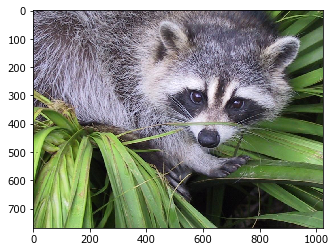

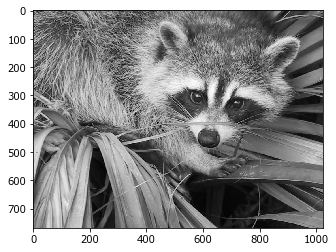

In [2]:
import numpy as np
from scipy import signal,misc
import matplotlib.pyplot as plt

def show(img):
    fig,ax=plt.subplots()
    imgplot=plt.imshow(img)
#     ax.set_axis_off()
    plt.gray()
    plt.show()

    
image=misc.face()
show(image)
#face = (0.21 * face[:,:,0] + 0.71 * face[:,:,1] + 0.07 * face[:,:,2]).astype('uint8')
#彩色照片转黑白rgb比例为：0.21/0.71／0.07
bw=(0.21*image[:,:,0]+0.71*image[:,:,1]+0.07*image[:,:,2]).astype('uint8')
show(bw)

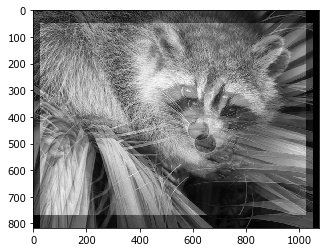

In [176]:
w=np.zeros((50,50))
w[0][0]=1
w[49][25]=1
bw_new=signal.fftconvolve(bw,w)
show(bw_new)

![](http://upload-images.jianshu.io/upload_images/1271438-580b00903fdd294e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

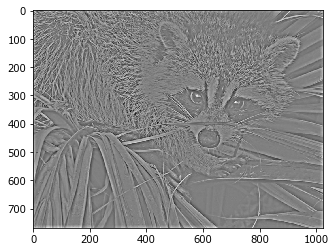

(768, 1024)

In [177]:
#高反差保留
radius=10
filter_=np.full((radius*2+1,radius*2+1),-1)
filter_[radius,radius]=pow((radius*2+1),2)-1
conv_ed=signal.convolve2d(bw,filter_,mode='same')
show(conv_ed)
conv_ed.shape

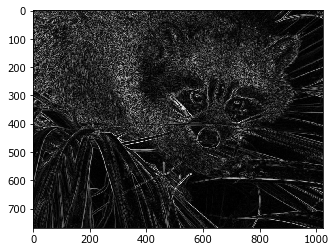

In [178]:
from skimage import filters
sobel_ed=filters.sobel(bw)
show(sobel_ed)

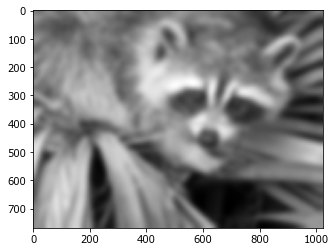

(768, 1024)

In [225]:
#高斯模糊
w=signal.gaussian(50,10.0)
gaussian_img=signal.sepfir2d(bw.astype('float64'),w,w)
show(gaussian_img)
gaussian_img.shape

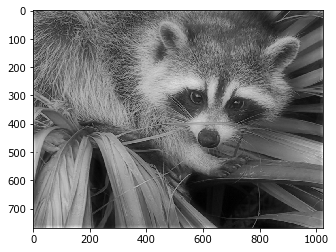

In [227]:
recovered=gaussian_img+conv_ed
show(recovered)

## [缓动曲线](http://www.pxrgo.com/math/2017/08/28/ease-curve/)

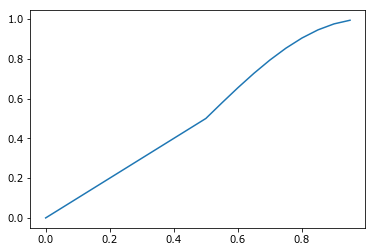

In [230]:
#曲线调整

#归一化到: 0-1
normalization=(recovered-np.min(recovered))/np.max(recovered)

#缓动曲线
#http://www.pxrgo.com/math/2017/08/28/ease-curve/

def curve_s(x):
    """
    easeOut
    """
    return x if x<=0.5 else 0.5*(math.sin(math.pi*(x-0.5))+1)

index=np.arange(0,1,0.05)
y=[curve_s(x) for x in index]

fig,ax=plt.subplots()
ax.plot(index,y)
plt.show()

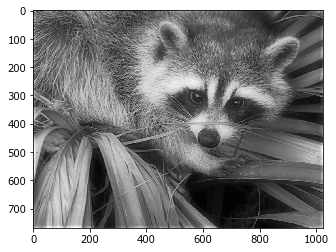

(0.0, 0.999454560685215)

In [231]:
#将曲线运用到图片recovered
curved=np.apply_along_axis(lambda arr:[curve_s(x) for x in arr],1,normalization)
show(curved)
np.min(curved),np.max(curved)

In [ ]:
radius=20
scope=np.arange(-radius,radius+1)
x,y=np.meshgrid(scope,scope)
arr=np.rec.fromarrays([x,y])
import math
_weights=np.apply_along_axis(lambda coord : math.sqrt(pow(coord[0],2)+pow(coord[1],2)),2,arr.tolist())
_weights.shape

In [ ]:
corr_img=signal.correlate2d(bw,_weights/np.max(_weights),mode='same',boundary='symm')
show(corr_img)

# 月球登陆图片降噪
https://wizardforcel.gitbooks.io/scipy-lecture-notes/content/4.html

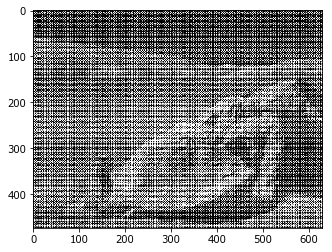

(474, 630)

In [236]:
import matplotlib.image as mpimg
path='/Users/yexianyong/Desktop/jupyter_notebook/工具学习/moonlanding.png'
img=mpimg.imread(path)
show(img)
img.shape

### 图像中像素灰度值变化快的就是高频部分，变化慢的就是低频部分。
http://blog.csdn.net/charlene_bo/article/details/70877999

（1）什么是低频?

      低频就是颜色缓慢地变化,也就是灰度缓慢地变化,就代表着那是连续渐变的一块区域,这部分就是低频. 对于一幅图像来说，除去高频的就是低频了，也就是边缘以内的内容为低频，而边缘内的内容就是图像的大部分信息，即图像的大致概貌和轮廓，是图像的近似信息。

（2）什么是高频?

     反过来, 高频就是频率变化快.图像中什么时候灰度变化快?就是相邻区域之间灰度相差很大,这就是变化得快.图像中,一个影像与背景的边缘部位,通常会有明显的差别,也就是说变化那条边线那里,灰度变化很快,也即是变化频率高的部位.因此，图像边缘的灰度值变化快，就对应着频率高，即高频显示图像边缘。图像的细节处也是属于灰度值急剧变化的区域，正是因为灰度值的急剧变化，才会出现细节。
     
   另外噪声（即噪点）也是这样,在一个像素所在的位置,之所以是噪点,就是因为它与正常的点颜色不一样了，也就是说该像素点灰度值明显不一样了,,也就是灰度有快速地变化了,所以是高频部分，因此有噪声在高频这么一说。

In [237]:
import scipy
fft2_ed=scipy.fftpack.fft2(img)
# show(fft2_ed)
fft2_ed.shape,fft2_edd

((474, 630), array([[126598.45      +0.j       ,  -4608.5796 -1892.4688j   ,
           -322.093    -20.27744j  , ...,   -906.1585 +1539.3081j   ,
           -322.093    +20.27744j  ,  -4608.5796 +1892.4688j   ],
        [ -9421.1    +5242.1133j   ,   5224.016  -3171.7434j   ,
           1607.9927 +1269.4243j   , ...,   -677.34503 -936.16174j  ,
            354.6247 -1003.8348j   ,   1965.366  -2188.0593j   ],
        [ -2928.3513 +7280.916j    ,  -1116.4065 +1338.3179j   ,
           -474.20056 +385.40216j  , ...,    239.7723  -977.2129j   ,
           1582.9283  -261.95346j  ,   2641.927   -292.09366j  ],
        ...,
        [  1850.5718 -2451.1787j   ,   -781.0807   +13.744501j ,
            377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621j   ,
          -2705.5718 -3488.529j    ,   1897.404  -2281.9092j   ],
        [ -2928.3513 -7280.916j    ,   2641.927   +292.09366j  ,
           1582.9283  +261.95346j  , ...,  -2208.4302   +81.807434j ,
           -474.20056 -385.40216j  ,

In [ ]:
#未完待续



# [python计算机视觉2：图像边缘检测](https://www.cnblogs.com/smallpi/p/4555854.html)


**如果我们需要检测一个灰度图像的边缘，我们需要找出哪里的灰度变化最大。显然，灰度变化越大，对比度越强，边缘就越明显。**

实际上，图像矩阵是离散的。
连续函数求变化率用的是导数，而离散函数求变化率用的是差分。
差分的概念很容易理解，就是用相邻两个数的差来表示变化率。